<a href="https://colab.research.google.com/github/QuantumNews/Grovers-search-algorithm-and-QAE/blob/main2/small__QAE_A_circuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pylatexenc

In [ ]:

!pip3 install qiskit

     |████████████████████████████████| 6.5 MB 32.4 MB/s 
     |████████████████████████████████| 18.0 MB 68 kB/s 
     |████████████████████████████████| 238 kB 53.5 MB/s 
     |████████████████████████████████| 200 kB 24.3 MB/s 
     |████████████████████████████████| 54 kB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 30.0 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 943 kB 41.2 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 3.6 MB 46.4 MB/s 
     |████████████████████████████████| 113 kB 58.4 MB/s 
  Created wheel for qiskit: filename=qiskit-0.35.0-py3-none-any.whl size=11839 sha256=e676ea44529b56ec6abc929e30ebc7f37618001c0c98fd0324c8e86c26a59baf
  Stored in directory: /root/.cache/pip/wheels/1e/0a/42/93e5cc11795fb0a85fcf6686eac2791def0c9a1cad0a77

In [ ]:
import qiskit
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx
from math import pi
from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *


backend = BasicAer.get_backend('unitary_simulator')



In [ ]:
from qiskit import IBMQ


In [ ]:
IBMQ.save_account('63af478871059f44c837562334bb53037b1591a9140852e357e30b6d30617cb79596f7e6835d571b3374e295446d6222be23ab1ac84d45817eb91a22a23c4ddd')

In [ ]:
overwrite=True


In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
from qiskit import *


In [ ]:
from qiskit.providers.ibmq.exceptions import IBMQAccountCredentialsInvalidToken
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
circuitA = QuantumCircuit(qr,cr)

%matplotlib inline
circuitA.draw()

q0_0: 
      
q0_1: 
      
q0_2: 
      
q0_3: 
      
c0: 4/

In [ ]:
circuitA.x(qr[0])

circuitA.h(qr[0])
circuitA.h(qr[2])
circuitA.cz(qr[0],qr[2])
circuitA.ry(0.5/2,qr[0])
circuitA.ry(-1/2,qr[2])
circuitA.cz(qr[0],qr[2])
circuitA.h(qr[0])
circuitA.h(qr[2])

circuitA.h(qr[0])
circuitA.h(qr[1])
circuitA.cz(qr[0],qr[1])
circuitA.ry(pi/2,qr[0])
circuitA.ry(-pi/2,qr[1])
circuitA.cz(qr[0],qr[1])
circuitA.h(qr[0])
circuitA.h(qr[1])

circuitA.h(qr[2])
circuitA.h(qr[3])
circuitA.cz(qr[2],qr[3])
circuitA.ry(pi/2,qr[2])
circuitA.ry(-pi/2,qr[3])
circuitA.cz(qr[2],qr[3])
circuitA.h(qr[2])
circuitA.h(qr[3])

circuitA.h(qr[0])
circuitA.h(qr[2])
circuitA.cz(qr[0],qr[2])
circuitA.ry(pi/2,qr[0])
circuitA.ry(-pi/2,qr[2])
circuitA.cz(qr[0],qr[2])
circuitA.h(qr[0])
circuitA.h(qr[2])


In [ ]:
circuitA.draw()

┌───┐┌───┐   ┌──────────┐   ┌───┐┌───┐   ┌─────────┐    ┌───┐┌───┐   »
q0_0: ┤ X ├┤ H ├─■─┤ Ry(0.25) ├─■─┤ H ├┤ H ├─■─┤ Ry(π/2) ├──■─┤ H ├┤ H ├─■─»
      ├───┤└───┘ │ └──────────┘ │ └───┘└───┘ │ ├─────────┴┐ │ ├───┤└───┘ │ »
q0_1: ┤ H ├──────┼──────────────┼────────────■─┤ Ry(-π/2) ├─■─┤ H ├──────┼─»
      ├───┤      │ ┌──────────┐ │ ┌───┐┌───┐   ├─────────┬┘   ├───┤┌───┐ │ »
q0_2: ┤ H ├──────■─┤ Ry(-0.5) ├─■─┤ H ├┤ H ├─■─┤ Ry(π/2) ├──■─┤ H ├┤ H ├─■─»
      ├───┤        └──────────┘   └───┘└───┘ │ ├─────────┴┐ │ ├───┤└───┘   »
q0_3: ┤ H ├──────────────────────────────────■─┤ Ry(-π/2) ├─■─┤ H ├────────»
      └───┘                                    └──────────┘   └───┘        »
c0: 4/═════════════════════════════════════════════════════════════════════»
                                                                           »
«      ┌─────────┐    ┌───┐
«q0_0: ┤ Ry(π/2) ├──■─┤ H ├
«      └─────────┘  │ └───┘
«q0_1: ─────────────┼──────
«      ┌──────────┐ │ ┌───┐
«q0_2: ┤ Ry(-π/2) ├─■─┤ H ├
«      └──────────┘   └───┘
«q0_3: ────────────────────
«                          
«c0: 4/════════════════════
«

This is the circuit for the inner product estimation of A. Now lets look at constructing the Gover interation; ASASA:

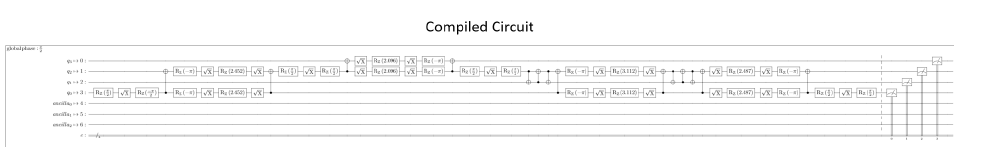

In [ ]:
simulator = Aer.get_backend('qasm_simulator')

In [ ]:
result = execute(circuitA, backend = simulator).result()

In [ ]:
from qiskit.tools.visualization import plot_histogram

In [ ]:
plot_histogram(result.get_counts(circuitA))

QiskitError: ignored

In [ ]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-03-17 23:58:57,335: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
provider = IBMQ.get_provider('ibm-q')

In [ ]:
qcomp = provider.get_backend('ibmq_lima')

In [ ]:
job = execute(circuitA, backend=qcomp)

In [ ]:
from qiskit.tools.monitor import job_monitor

In [ ]:
job_monitor(job)

Job Status: job has successfully run


In [ ]:
results = job.result()

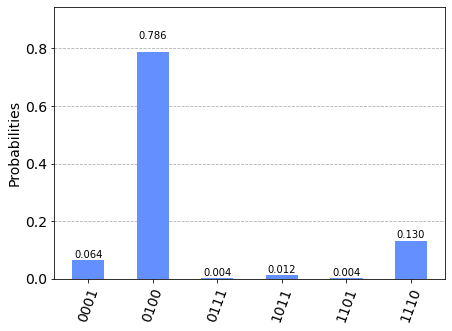

In [ ]:
plot_histogram(result.get_counts(circuitG))

In [ ]:
from qiskit.tools.visualization import plot_bloch_multivector

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend = simulator).result()
statevector = result.get_statevector()
print(statevector)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.-1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2))


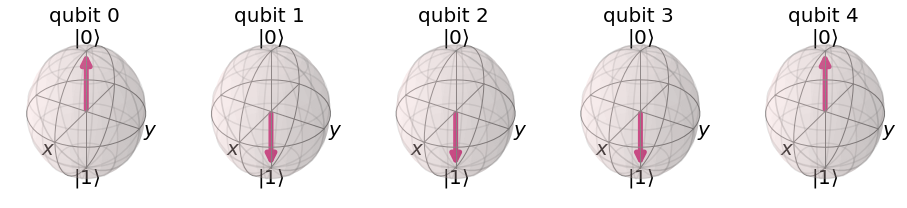

In [ ]:
plot_bloch_multivector(statevector)


In [ ]:
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unitary = result.get_unitary()
print(unitary)

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-3 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method.


QiskitError: ignored